In [50]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
#load the data
data = pd.read_csv('https://raw.githubusercontent.com/shawnkan/Simplilearn/main/ML/seattleWeather_1948-2017.csv')
print('data loaded')

data loaded


In [52]:
data

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [53]:
data.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [54]:
data.dropna(inplace=True)

In [55]:
data.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [56]:
#check the count of class
data['RAIN'].value_counts()

False    14648
True     10900
Name: RAIN, dtype: int64

<Axes: xlabel='TMAX', ylabel='Count'>

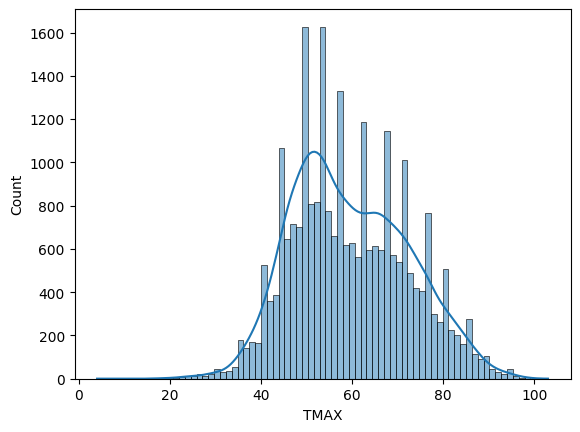

In [57]:
sns.histplot(data['TMAX'],kde=True)

<function matplotlib.pyplot.show(close=None, block=None)>

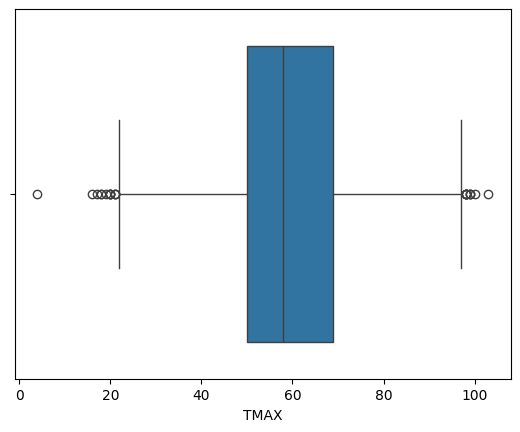

In [58]:
sns.boxplot(x=data['TMAX'])
plt.show

In [59]:
data.drop(data[data['TMAX']>97].index,inplace=True)

In [60]:
data.drop(data[data['TMAX']<21].index,inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

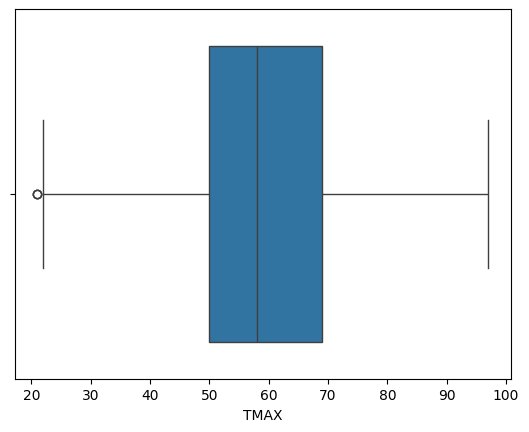

In [61]:
sns.boxplot(x=data['TMAX'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

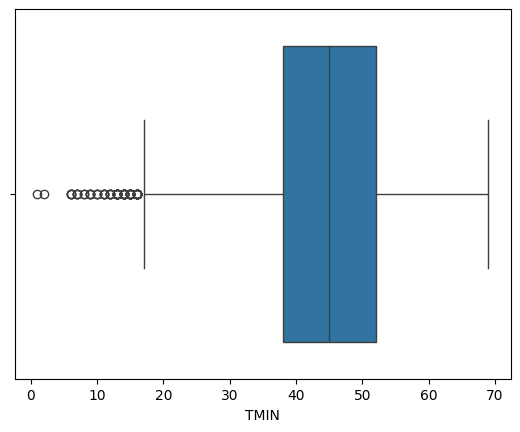

In [62]:
sns.boxplot(x=data['TMIN'])
plt.show

In [63]:
#data.drop(data[(data['TMIN']>97 | data['TMIN']<21)].index,inplace=True)

In [64]:
data.drop(data[data['TMIN']<17].index,inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

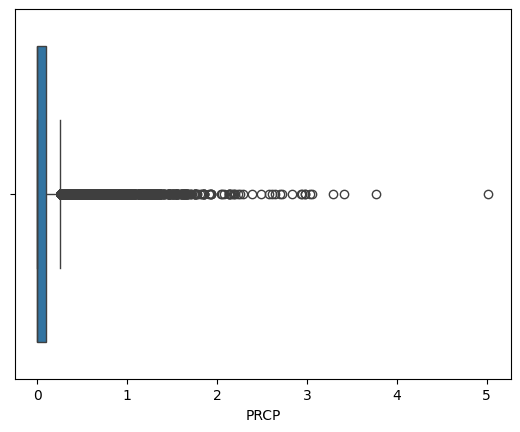

In [65]:
sns.boxplot(x=data['PRCP'])
plt.show

In [66]:
#apply label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [67]:
data['RAIN'] = le.fit_transform(data['RAIN'])

In [68]:
data

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,0
25547,2017-12-11,0.00,49,29,0
25548,2017-12-12,0.00,46,32,0
25549,2017-12-13,0.00,48,34,0


In [69]:
#create indep & dep var
X=data.iloc[:,1:4]

In [70]:
y=data.iloc[:,-1]

In [71]:
y

0        1
1        1
2        1
3        1
4        1
        ..
25546    0
25547    0
25548    0
25549    0
25550    0
Name: RAIN, Length: 25444, dtype: int64

In [72]:
#create split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
X_train.shape

(17810, 3)

In [74]:
X_test.shape

(7634, 3)

In [75]:
#Apply logistic regression over the data
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()


In [76]:
#training
log_reg.fit(X_train, y_train)
print('train complete')

train complete


In [77]:
#pred
y_pred = log_reg.predict(X_test)

In [78]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [79]:
y_test

10144    1
5898     0
13823    1
18705    0
15343    1
        ..
24639    0
8822     1
15645    0
7723     0
22136    1
Name: RAIN, Length: 7634, dtype: int64

In [80]:
#evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [81]:
print(confusion_matrix(y_test,y_pred))

#0,0 TN   1,0 FP
#1,0 FN   1,1 TP


[[4363   30]
 [ 536 2705]]


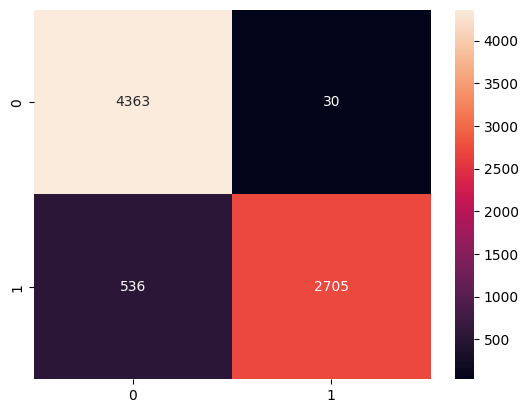

In [82]:
#heatmap
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d')
plt.show()

In [83]:
print('Accuracy=', accuracy_score(y_test,y_pred))

Accuracy= 0.9258580036678019


In [84]:
print('Precision =', precision_score(y_test,y_pred))

Precision = 0.9890310786106032


In [85]:
print('Recall=', recall_score(y_test,y_pred))

Recall= 0.8346189447701327


In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4393
           1       0.99      0.83      0.91      3241

    accuracy                           0.93      7634
   macro avg       0.94      0.91      0.92      7634
weighted avg       0.93      0.93      0.92      7634



In [87]:
#save the model
import joblib
joblib.dump(log_reg, 'Rain_pred_ml.pkl')
print('model saved')

model saved


In [88]:
#load the model
model=joblib.load('Rain_pred_ml.pkl')
print('model is loaded')

model is loaded


In [89]:
#real time value
prcp = 0.30
Tmax = 38
Tmin = 31
pred = model.predict([[prcp,Tmax,Tmin]])
if pred ==1:
  print('it will rain')
else:
  print('not rain')

it will rain


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [90]:
#calculate prob on X_test
pred_prob = log_reg.predict_proba(X_test)
pred_prob

array([[6.89208979e-01, 3.10791021e-01],
       [9.25849367e-01, 7.41506325e-02],
       [4.53004778e-01, 5.46995222e-01],
       ...,
       [8.59532175e-01, 1.40467825e-01],
       [7.59003582e-01, 2.40996418e-01],
       [4.11510017e-05, 9.99958849e-01]])

In [91]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [92]:
#take prob of class 1
pred_prob[:,1]

array([0.31079102, 0.07415063, 0.54699522, ..., 0.14046783, 0.24099642,
       0.99995885])

In [93]:
print(y_test)

10144    1
5898     0
13823    1
18705    0
15343    1
        ..
24639    0
8822     1
15645    0
7723     0
22136    1
Name: RAIN, Length: 7634, dtype: int64


In [94]:
#roc_auc_score - Receiver Operating Characteristics, Area Under the Curve
#access model ability to discriminate bot the classes across diff prob threshold
# score =1 best model
# =0.5 no better than random chance, poor

In [95]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test,pred_prob[:,-1])
print('AUC Score', auc_score)

AUC Score 0.9777368738925979


In [98]:
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1])

In [99]:
thresh

array([2.        , 1.        , 1.        , ..., 0.0060422 , 0.0059292 ,
       0.00283032])

In [100]:
thresh.shape

(1579,)

In [101]:
# TPR = tp/(tp+fn) = recall
#fpr =fp/ (fp+tn) -> how many are predicted as positive across all negative
"""
Actual  pred_prob 0.1  0.2  0.5   0.8
1       .8        1 tp             1
0       .5        1 fp             0
1       .7        1 tp             0
1       .3        1 tp             0
0       .4        1 fp             0
0       .7        1 fp             0
1       .6        1 tp             0

th =0.1 tpr = 4/4 =100% fpr = 3/3 =100%
"""

'\nActual  pred_prob 0.1  0.2  0.5   0.8\n1       .8        1 tp             1\n0       .5        1 fp             0\n1       .7        1 tp             0\n1       .3        1 tp             0\n0       .4        1 fp             0\n0       .7        1 fp             0\n1       .6        1 tp             0\n\nth =0.1 tpr = 4/4 =100% fpr = 3/3 =100%\n'

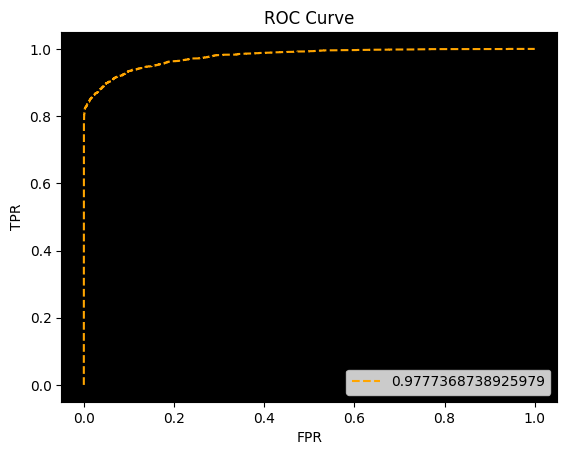

In [104]:
#plot the ROC curve
fig, ax = plt.subplots()
ax.set_facecolor('black')
plt.plot(fpr,tpr,linestyle='--', color='orange', label=auc_score)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.show()

In [ ]:
help(log_reg)